In [22]:
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
#from scipy.ndimage import gaussian_filter1d
import sys
import matplotlib.animation as animation

In [23]:
date = '20211130'
dataNo = 4
scanNo = 4

In [24]:
path = r"./"+date
path_img = path + r"/data" + str('%03d' % dataNo) + "/raw"
path_scan = path + r"/scandir/Scan" + str('%03d' % scanNo) + '.txt'
path_param = path + r"/scandir/Parameters" + str('%03d' % scanNo) + '.txt'
scan_data = pd.read_csv(path_scan, delimiter='\t')

In [25]:
scan_param = scan_data['A0139: LS Phase 1']

In [26]:
share = Path(path_img)
if share.exists():
    trans_files = list(Path(path_img).glob('seq*_trans001.tiff'))
    flat_files = list(Path(path_img).glob('seq*_flat001.tiff'))
    update_files = list(Path(path_img).glob('seq*_update001.tiff'))
else:
    print(No)

img_flat_ave =[]
img_trans_list = []
for N in range(len(trans_files)):
    img_flat_ave += [np.array(Image.open(flat_files[N]))]
img_flat_ave = np.average(img_flat_ave,axis=0)
for N in range(len(trans_files)):
    img_trans_list += [np.array(Image.open(trans_files[N])) - img_flat_ave]

In [27]:
CoMx_list=[]
CoMy_list=[]
for N in range(len(trans_files)):
    CoMy = []
    CoMx = []
    nx=np.sum(img_trans_list[N], axis=0)/np.sum(img_trans_list[N])
    ny=np.sum(img_trans_list[N], axis=1)/np.sum(img_trans_list[N])
    for i in range(len(nx)):
        CoMx += [i*nx[i]]
    for i in range(len(ny)):
        CoMy += [i*ny[i]]
    CoMx_list.append(np.sum(CoMx))
    CoMy_list.append(np.sum(CoMy))

(-15.0, 15.0)

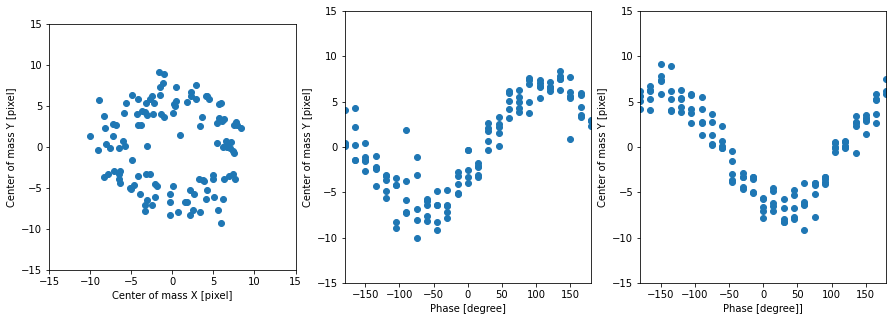

In [41]:
y_mean = np.mean(CoMy_list)
x_mean = np.mean(CoMx_list)
fig =plt.figure(figsize=[15,5])
ax1 = fig.add_subplot(1,3,1)
ax1.scatter(CoMx_list-x_mean,CoMy_list-y_mean)
ax1.set_xlabel("Center of mass X [pixel]")
ax1.set_ylabel("Center of mass Y [pixel]")
ax1.set_xlim(-15,15)
ax1.set_ylim(-15,15)
ax1.set_aspect('equal')

ax2 = fig.add_subplot(1,3,2)
ax2.scatter(scan_param,CoMx_list-x_mean)
ax2.set_xlabel("Phase [degree]")
ax2.set_ylabel("Center of mass Y [pixel]")
ax2.set_xlim(-180,180)
ax2.set_ylim(-15,15)
# ax2.set_aspect('equal')

ax3 = fig.add_subplot(1,3,3)
ax3.scatter(scan_param,CoMy_list-y_mean)
ax3.set_xlabel("Phase [degree]]")
ax3.set_ylabel("Center of mass Y [pixel]")
ax3.set_xlim(-180,180)
ax3.set_ylim(-15,15)
# ax3.set_aspect('equal')

In [33]:
unique_list = scan_param.unique()
for i in range(len(unique)):
    for N in range(len(trans_files)):
        